In [2]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import itertools
%matplotlib inline
sns.set()

In [3]:
data_sample = pd.read_csv('DataSample__201709211530.csv')
data_sample2 = pd.read_csv('DataSample__201710061552.csv',dtype={"value": str})
#data_sample2['value'] = pd.to_numeric(data_sample2['value'],errors='coerce')
#data_sample['value'] = pd.to_numeric(data_sample['value'],errors='coerce')
data_sample = data_sample.append(data_sample2)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)


types = data_sample['type'].unique()
types

for t in types:
    f = lambda x: float(x.replace(',',''))
    # checks if the values contain decimal points, and uses a float conversion if so
    for v in data_sample.loc[data_sample['type'] == t, 'value'].head():
        if '.' in v:
            f = lambda x: float(x.replace(',',''))
            break
    data_sample.loc[data_sample['type'] == t, 'value'] = data_sample.loc[data_sample['type'] == t, 'value'].map(f)
for col in ['startDate', 'endDate', 'createdAt', 'updatedAt']:
    data_sample[col] = pd.to_datetime(data_sample[col], format='%Y-%m-%d %X')
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday 

_id                                 owner  \
0  1ff0fb89-6e1b-4601-84d0-98c79fdc5f2e  00000000-56ff-538b-2223-e1800b5e3ddb   
1  78219621-1da4-4e3b-87bc-f4885718c63f  00000000-56ff-538b-2223-e1800b5e3ddb   
2  2d917e7e-0844-4f52-b15e-2a5346c96dda  00000000-56ff-538b-2223-e1800b5e3ddb   
3  ab800f4b-bef7-434e-8e57-e0fccc44bfb7  00000000-56ff-538b-2223-e1800b5e3ddb   
4  fb2a0865-17c3-4ac0-a782-749cc7befe12  00000000-56ff-538b-2223-e1800b5e3ddb   

                             source                              sourceId  \
0  healthkit:com.withings.wiScaleNG  A1DB680E-F9C4-4FA4-8818-1D35E398B5F0   
1  healthkit:com.withings.wiScaleNG  2030515A-1C70-40F3-8470-BDE99ABFC906   
2  healthkit:com.withings.wiScaleNG  96D21A44-67D7-412D-BF3A-543819A8EBF0   
3  healthkit:com.withings.wiScaleNG  5D73FD9D-17E1-480C-9235-3E5036503E6A   
4  healthkit:com.withings.wiScaleNG  5A9AB03C-30C9-43B9-9742-02E237A6F36D   

    sourceName             type           startDate             endDate  \
0  Health Mate       health-bmi 2014-08-27 21:41:23 2014-08-27 21:41:23   
1  Health Mate    health-weight 2014-08-27 21:41:23 2014-08-27 21:41:23   
2  Health Mate       health-bmi 2014-08-28 06:24:53 2014-08-28 06:24:53   
3  Health Mate  health-body-fat 2014-08-28 06:24:53 2014-08-28 06:24:53   
4  Health Mate    health-weight 2014-08-28 06:24:53 2014-08-28 06:24:53   

      value  content  originalData           createdAt           updatedAt  \
0   26.7387      NaN           NaN 2017-08-31 11:20:49 2017-08-31 11:20:49   
1    71.042      NaN           NaN 2017-08-31 11:20:58 2017-08-31 11:20:58   
2   26.5866      NaN           NaN 2017-08-31 11:20:49 2017-08-31 11:20:49   
3  0.258699      NaN           NaN 2017-08-31 11:20:53 2017-08-31 11:20:53   
4    70.638      NaN           NaN 2017-08-31 11:20:58 2017-08-31 11:20:58   

  duration  day_of_week  
0   0 days            2  
1   0 days            2  
2   0 days            3  
3   0 days            3  
4   0 days            3

In [4]:
x1 = data_sample.type
x2 = data_sample.value

types = ['health-bmi','health-body-fat','health-weight', 'health-step-count']
type(x1)

pandas.core.series.Series

In [5]:

data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])

bmi = data_sample[data_sample['type'] == 'health-bmi']
bodyfat = data_sample[data_sample['type'] == 'health-body-fat']


bmi.index = bmi['startDate']
bodyfat.index = bodyfat['startDate']


bmi['value'] = pd.to_numeric(bmi['value'])
bmi = bmi.loc[:,'value']
bmi = bmi.resample('D').mean()


bodyfat['value'] = pd.to_numeric(bodyfat['value'])
bodyfat = bodyfat.loc[:,'value']
bodyfat = bodyfat.resample('D').mean()

bmi = bmi.to_frame('bmi')
bmi['bodyfat'] = bodyfat

bmi


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


bmi   bodyfat
startDate                      
2013-11-25  27.188028  0.276388
2013-11-26  26.746608  0.277415
2013-11-27        NaN       NaN
2013-11-28  26.885394  0.285580
2013-11-29  26.455147  0.268143
2013-11-30  26.376778  0.274755
2013-12-01  26.747303  0.263562
2013-12-02        NaN       NaN
2013-12-03        NaN       NaN
2013-12-04        NaN       NaN
2013-12-05  26.148151  0.263705
2013-12-06        NaN       NaN
2013-12-07        NaN       NaN
2013-12-08        NaN       NaN
2013-12-09        NaN       NaN
2013-12-10        NaN       NaN
2013-12-11        NaN       NaN
2013-12-12  26.558027  0.268536
2013-12-13        NaN       NaN
2013-12-14  26.457102  0.268293
2013-12-15  26.594138  0.267957
2013-12-16  26.589200  0.270079
2013-12-17  26.580712  0.277779
2013-12-18  26.658337  0.272309
2013-12-19  26.333028  0.268759
2013-12-20  26.139200  0.259614
2013-12-21  26.078398  0.265456
2013-12-22  26.041672  0.244338
2013-12-23  26.209572  0.230290
2013-12-24  26.551084  0.270314
...               ...       ...
2017-09-07  26.787968  0.283237
2017-09-08        NaN       NaN
2017-09-09  26.829016  0.284794
2017-09-10  26.838583  0.275021
2017-09-11  26.886045  0.251486
2017-09-12  26.844448  0.280733
2017-09-13  26.718212  0.276064
2017-09-14        NaN       NaN
2017-09-15  26.365126  0.283671
2017-09-16        NaN       NaN
2017-09-17  26.622005  0.260165
2017-09-18  26.704450  0.255211
2017-09-19  26.824978  0.271526
2017-09-20  26.677473  0.277850
2017-09-21  26.648727  0.250484
2017-09-22  26.636985  0.268694
2017-09-23  26.914818  0.288611
2017-09-24  27.013582  0.272988
2017-09-25  26.742059  0.266663
2017-09-26  26.780867  0.287000
2017-09-27  26.671637  0.262533
2017-09-28  26.700143  0.261080
2017-09-29  26.797119  0.256908
2017-09-30  26.843214  0.267971
2017-10-01  27.386114  0.287972
2017-10-02        NaN       NaN
2017-10-03  26.640315  0.256967
2017-10-04        NaN       NaN
2017-10-05  26.221949  0.262354
2017-10-06  26.136101  0.247894

[1412 rows x 2 columns]

In [6]:
corr_linear = bmi['bmi'].corr(bmi['bodyfat'])
corr_linear

0.30769084788819434

In [7]:
corr_nonlinear = bmi['bmi'].corr(bmi['bodyfat'], method='spearman')
corr_nonlinear

0.3814626156706214

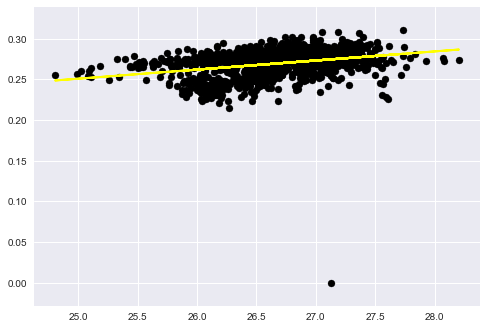

In [8]:
bmi = bmi.dropna()
x = bmi.bmi.values
y = bmi.bodyfat.values
x = x.reshape(len(x), 1)
y = y.reshape(len(x), 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='yellow', linewidth=2)

In [9]:
r_squared = regr.score(x, y)
print ("The r^2 value is {}".format(r_squared))

The r^2 value is 0.0946736578742


In [10]:
corr_info = stats.stats.pearsonr(x, y)
r = corr_info[0][0]
p = corr_info[1][0]
print ("The r value for bmi to bodyfat is {} and p is {}".format(r, p))

The r value for bmi to bodyfat is 0.307690847888 and p is 7.14940581065e-24


In [11]:
def prepare_table(x, y,time='D',data_sample=data_sample):
    steps = data_sample[data_sample['type'] == x]
    bodyfat = data_sample[data_sample['type'] == y]


    steps.index = steps['startDate']
    bodyfat.index = bodyfat['startDate']


    steps['value'] = pd.to_numeric(steps['value'])
    steps = steps.loc[:,'value']
    if x == 'health-step-count':
        steps = steps.resample(time).sum()
    else:
        steps = steps.resample(time).mean()


    bodyfat['value'] = pd.to_numeric(bodyfat['value'])
    bodyfat = bodyfat.loc[:,'value']
    bodyfat = bodyfat.resample(time).mean()

    steps = steps.to_frame('first')
    steps['second'] = bodyfat
    
    return steps

In [12]:
def plotter(steps):
    steps = steps.dropna()
    x = steps['first'].values
    y = steps['second'].values
    x = x.reshape(len(x), 1)
    y = y.reshape(len(x), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    plt.scatter(x, y,  color='black')
    plt.plot(x, regr.predict(x), color='yellow', linewidth=2)
    
    corr_info = stats.stats.pearsonr(x, y)
    r = corr_info[0][0]
    p = corr_info[1][0]
    return r, p


In [13]:
users = data_sample['owner'].unique()
users

array(['00000000-56ff-538b-2223-e1800b5e3ddb',
       '00000000-5851-ee08-eb34-e20acc5af74e',
       '00000000-584e-1f39-bdee-d4102b989d01',
       '00000000-584d-a4f0-bdee-d4102b989ce5'], dtype=object)

In [14]:
'''
for i in itertools.combinations(types, 2):
    t1 = i[0]
    t2 = i[1]
    a, b = plotter(prepare_table(t1, t2, data_sample=data_sample[data_sample['owner']==users[0]]))
    plt.show()
    print("The r and p values for {} and {} are: r = {} and p = {}".format(t1, t2, a, b))
'''

'\nfor i in itertools.combinations(types, 2):\n    t1 = i[0]\n    t2 = i[1]\n    a, b = plotter(prepare_table(t1, t2, data_sample=data_sample[data_sample[\'owner\']==users[0]]))\n    plt.show()\n    print("The r and p values for {} and {} are: r = {} and p = {}".format(t1, t2, a, b))\n'

In [15]:
bmi = data_sample[data_sample['type'] == 'health-bmi']
bmi.index = bmi['startDate']
bmi['value'] = pd.Series(bmi['value']).convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


           value
count  38.000000
mean   26.657827
std     0.519584
min    25.671272
25%    26.196478
50%    26.691365
75%    27.061039
max    27.867441
           value
count  48.000000
mean   26.615515
std     0.477032
min    25.331828
25%    26.268160
50%    26.680382
75%    26.991077
max    27.469895


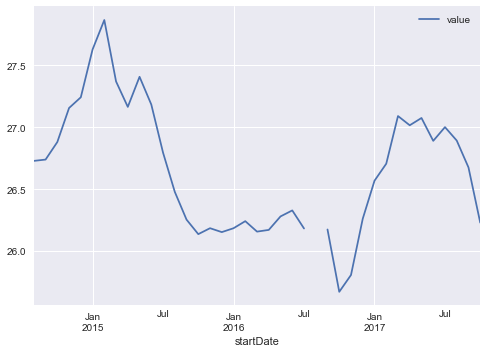

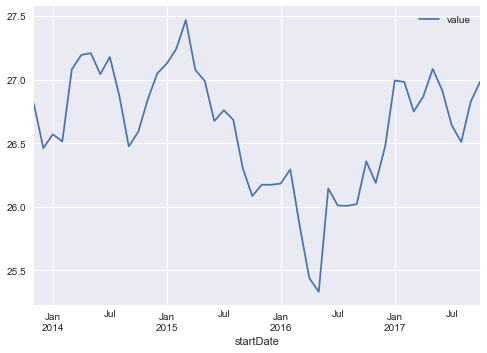

In [16]:
# BMI by month over the whole period
bmi_means = {}
for owner in bmi['owner'].unique():
    data_by_owner = bmi[bmi['owner'] == owner][['value']]
    resampled_data = data_by_owner.resample('M').mean()
    resampled_data.plot()
    print(resampled_data.describe())
    mean = resampled_data.describe().loc['mean', 'value']
    bmi_means[owner] = mean
    

In [17]:
for owner in bmi_means:
    print('Owner {} has monthly BMI mean of {}'.format(owner, bmi_means[owner]))

Owner 00000000-56ff-538b-2223-e1800b5e3ddb has monthly BMI mean of 26.6578270652
Owner 00000000-5851-ee08-eb34-e20acc5af74e has monthly BMI mean of 26.6155145882


           value
count  37.000000
mean   -0.000469
std     0.009063
min    -0.019238
25%    -0.006827
50%     0.000529
75%     0.005176
max     0.017613
           value
count  47.000000
mean    0.000190
std     0.010247
min    -0.016982
25%    -0.006328
50%     0.000372
75%     0.004706
max     0.032079


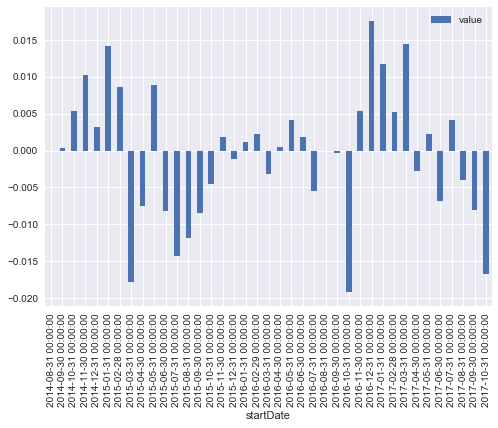

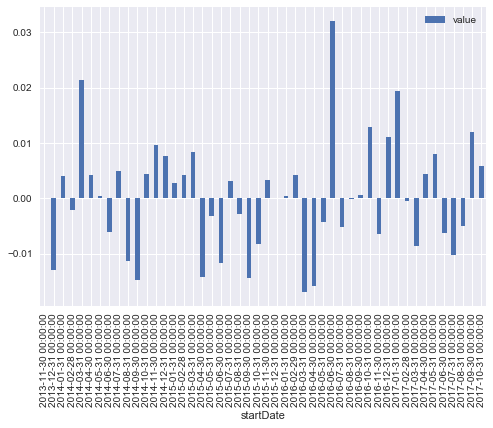

In [18]:
# pct_change slope comparison of each bmi
for owner in bmi['owner'].unique():
    data_by_owner = bmi[bmi['owner'] == owner][['value']]
    resampled_data = data_by_owner.resample('M').mean().pct_change()
    resampled_data.plot(kind='bar')
    print(resampled_data.describe())
    mean = resampled_data.describe().loc['mean', 'value']

In [19]:
weight = data_sample[data_sample['type'] == 'health-weight']
weight.index = weight['startDate']
weight['value'] = pd.Series(weight['value']).convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
